In [ ]:
## This is a series of examples demonstrating the use of the icanswim/cosmosis repo 
## for data science and machine learning projects.
## This repo is intended to be used as the boiler plate for data science and machine learning projects.
## See the icanswim/qchem repo for a demonstration of the use of this (icanswim/cosmosis) repo.

In [2]:
from model import FFNet, tv_model, IdentityModel, GPT
from learning import Learn, Selector, Metrics
from dataset import CDataset, SKDS, TVDS, ExampleDataset
from dataset import ImageDatasetStats, AsTensor, SqueezeN, DType, Pad1d, EmbedLookup, Reshape

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms

import numpy as np


In [ ]:
# cosmosis blank parameters

lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
ds_param = {'train_param': {'input_dict': {'X': ['feature_1','feature_2'],
                                           'feature_3': ['feature_3']},
                            'transforms': {'feature_1': [ExampleTransform(10), AsTensor()],
                                           'feature_2': [Reshape(-1), AsTensor()],
                                           'feature_3': [Pad1d(5), EmbedLookup(lookup_feature_3), AsTensor()]},
                            'boom': 'bang'}}

model_param = {'some_param': 128,
               'y': 'feature_3',
               'embed_param': {'feature_3': (voc,vec,padding_idx,trainable),
                               'some_param': True,
                               'flatten': True}} 
                                       
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'min_lr': .005} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([DS], 
              Model,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Optimizer, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=LossFunction,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=12, epochs=1, gpu=True)


In [2]:
# exploring cosmosis dataset (CDataset)

class ExampleTransform():
    def __init__(self, num):
        self.num = num
        
    def __call__(self, arr):
        return np.add(arr, self.num)


class ExampleDataset(CDataset):
    #zero is the lookup for the padding index 
    embed_lookup = {'feature_4': {'a': 1,'b': 2,'c': 3,'d': 4, '0': 0},
                    'feature_3': {'z1': 1, 'y1': 2, 'x1': 3, '0': 0},
                    'feature_6': {'e': 1, 'f': 2, 'g': 3, '0': 0}}
    
    def load_data(self, boom='bust'):
        
        datadic = {1: {'feature_1': np.asarray([.04]),
                       'feature_2': np.asarray([[.02,.03],[.04,.05]]),
                       'feature_3': np.asarray(['z1']),
                       'feature_4': np.asarray(['c','c','d']),
                       'feature_5': np.asarray([1.1]),
                       'feature_6': np.asarray(['e','f','g'])},
                   2: {'feature_1': np.asarray([.03]),
                       'feature_2': np.asarray([[.1,.2],[.3,.4]]),
                       'feature_3': np.asarray(['x1','z1','y1']),
                       'feature_4': np.asarray(['d','a','d']),
                       'feature_5': np.asarray([1.2]),
                       'feature_6': np.asarray(['f','f','g'])}}
        
        print(boom)
        return datadic
    
lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
lookup_feature_4 = ExampleDataset.embed_lookup['feature_4']
lookup_feature_6 = ExampleDataset.embed_lookup['feature_6']
ds_param = {'train_param': {'input_dict': {
                                           'X2': ['feature_1','feature_2'], 
                                           'X3': ['feature_2'],
                                           'embed_3': ['feature_3'],
                                           'embed_4': ['feature_4'],
                                           'target': ['feature_5'],
                                            },
                            'transforms': {'feature_1': [ExampleTransform(10), Reshape((-1)), AsTensor()],
                                           'feature_2': [Reshape((-1)), AsTensor()],
                                           'feature_3': [Pad1d(5), EmbedLookup(lookup_feature_3), AsTensor()],
                                           'feature_4': [Pad1d(5), EmbedLookup(lookup_feature_4), AsTensor()],
                                           'feature_5': [AsTensor()],
                                           'feature_6': [Pad1d(5), EmbedLookup(lookup_feature_6), AsTensor()]},
                            'boom': 'bang'}}
    
ed = ExampleDataset(**ds_param['train_param'])
print('ed[1]: ', ed[1])

model_param = {'device': 'cpu',
               'X': ['X2', 'X3'],
               'y': 'target',
               'embed_param': {'embed_3': (4,8,0,False),
                               'embed_4': (5,8,0,False),
                               'flatten': True}
              }

im = IdentityModel(model_param)
print(im)
print('embedding_layer: ', im.embedding_layer)

out = im(ed[1])
print('out: ', out)
print('out.shape: ', out.shape) # (1+4+4+5*8+5*8) = 89


bang
CDataset created...
ed[1]:  {'X2': tensor([10.0400,  0.0200,  0.0300,  0.0400,  0.0500], dtype=torch.float64), 'X3': tensor([0.0200, 0.0300, 0.0400, 0.0500], dtype=torch.float64), 'embed_3': tensor([1, 0, 0, 0, 0]), 'embed_4': tensor([3, 3, 4, 0, 0]), 'target': tensor([1.1000], dtype=torch.float64)}
default weight initialization...
IdentityModel model loaded...
number of model parameters:  0
IdentityModel(
  (layers): ModuleList(
    (0): Identity()
  )
)
embedding_layer:  {'embed_3': Embedding(4, 8, padding_idx=0), 'embed_4': Embedding(5, 8, padding_idx=0)}
out:  tensor([ 1.0040e+01,  2.0000e-02,  3.0000e-02,  4.0000e-02,  5.0000e-02,
         2.0000e-02,  3.0000e-02,  4.0000e-02,  5.0000e-02, -2.4293e-01,
        -3.5629e-01, -9.5759e-01, -5.7220e-02,  1.0037e+00,  1.0402e+00,
        -1.5197e+00, -7.0957e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,

In [3]:
# sklearn regression dataset wrapper (SKDS)
                            
ds_param = {'train_param': {'input_dict': {'model_input': ['X'],
                                           'y': ['y']},
                            'dataset': 'make_regression',
                            'sk_param': {'n_samples': 100,
                                         'n_features': 5},
                            'features_dtype': 'float32',
                            'targets_dtype': 'float32'}}

sk = SKDS(**ds_param['train_param'])

sk[1]


creating scikit learn make_regression dataset...
CDataset created...


{'model_input': array([-0.2335912 ,  0.18738404,  0.7560251 ,  0.7789686 , -0.6825345 ],
       dtype=float32),
 'y': array([45.014526], dtype=float32)}

In [4]:
# sklearn classification dataset wrapper (SKDS)
ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [AsTensor()],
                                           'X': [AsTensor()]},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 1000,
                                         'n_features': 30,
                                         'n_informative': 20,
                                         'n_clusters_per_class': 3,
                                         'flip_y': 0.05,
                                         'class_sep': 0.1,
                                         'n_classes': 4}}}

sk = SKDS(**ds_param['train_param'])

print(sk[1])


creating scikit learn make_classification dataset...
CDataset created...
{'X': tensor([-1.5245e+00,  1.0985e+01, -1.1655e+00,  4.1201e-01,  1.8883e+00,
        -1.7602e+00,  2.3665e-01, -5.3868e-01,  5.3431e+00,  3.1536e-01,
        -8.6168e-01, -6.0499e-01,  8.8338e-01, -5.9080e-03, -2.2489e-01,
         2.0536e+00, -6.8659e-02, -1.1091e+00, -3.1280e+00,  1.2603e+00,
        -4.2428e+00,  1.6979e+00, -6.3797e-02,  3.9568e-01, -1.4847e+00,
        -4.1932e-01, -7.2619e-01, -4.2227e+00,  1.0583e+00,  1.0434e+00]), 'y': tensor([3])}


In [5]:
# torchvision image dataset wrapper (TVDS)
ds_param = {'train_param': {'input_dict': {'features': ['images'],
                                           'y': ['labels']},
                            'dataset': 'MNIST',
                            'tv_param': {'root': './data/',
                                         'train': True,
                                         'download': True,
                                         'transform': transforms.Compose([transforms.Resize(224)]),
                                         'target_transform': None}}}

tvds = TVDS(**ds_param['train_param'])
tvds[1]


creating torch vision MNIST dataset...
CDataset created...


{'image': <PIL.Image.Image image mode=L size=224x224>, 'y': 0}

In [6]:
# torchvision image dataset wrapper (TVDS) with transforms and PIL stats
ds_param={'dataset': 'MNIST',
          'tv_param': {'root': './data/',
                       'train': True,
                       'download': True,
                       'transform': transforms.Compose([transforms.Resize(224)]),
                       'target_transform': None}}

tvds = TVDS(**ds_param)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3/255 = .13
#stddev: 73.7/255 = .29

creating torch vision MNIST dataset...
CDataset created...
images to process: 60000
images processed: 10000
images processed: 20000
images processed: 30000
images processed: 40000
images processed: 50000
images processed: 60000
mean: [33.33091590401786], stddev: [73.70246726596685]
mean:  [33.33091590401786]
stddev:  [73.70246726596685]


creating scikit learn make_regression dataset...
CDataset created...
FFNet model loaded...
applying _init_weights...
FFNet model loaded...
number of model parameters:  3944961
running model on gpu...

.....................

total elapsed time: 0:00:10.401717
epoch: 3
y_pred last 10:  tensor([[  485.0337],
        [ 1587.4788],
        [ -457.8343],
        [  100.3281],
        [ 1617.5239],
        [  143.1777],
        [  612.3293],
        [-2575.8225],
        [-2580.9783],
        [ 1649.5886]], device='cuda:0')
y last 10:  tensor([[  458.7098],
        [ 1621.2797],
        [ -379.7272],
        [  -15.3651],
        [ 1593.1735],
        [  152.7949],
        [  448.9200],
        [-2759.0188],
        [-2648.5278],
        [ 1734.2352]], device='cuda:0')
train loss: 25231.28332474817, val loss: 22821.226663523707
lr: 0.01

.....................

total elapsed time: 0:00:20.480076
epoch: 7
y_pred last 10:  tensor([[ 3411.2957],
        [ -718.0684],
        [  400.6284],
       

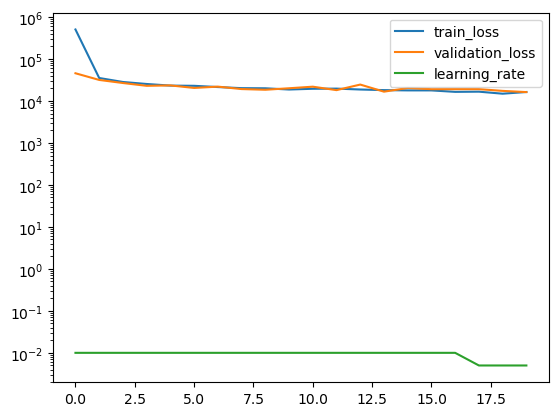

In [2]:
# sklearn regression dataset wrapper (SKDS) with sklearn metrics (Metrics) and cosmosis model (FFNet) 

model_param = {'in_channels': 1024, 
                'hidden': 1024, 
                'out_channels': 1, 
                'model_name': 'funnel',
                'activation': 'GELU'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'float32',
                            'dataset': 'make_regression',
                            'sk_param': {'n_samples':200000,
                                         'n_features': 1024,
                                         'n_informative': 800}}}
             
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'min_lr': .00125} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 3,
               'cooldown': 3}

learn = Learn([SKDS], 
              FFNet,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=MSELoss,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=512, epochs=20, gpu=True)


In [2]:
# sklearn classification dataset wrapper (SKDS) with sklearn metrics (Metrics) and cosmosis model (FFNet)
model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4,
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [SqueezeN()],
                                           'X': []},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 100000,
                                         'n_features': 300,
                                         'n_informative': 200,
                                         'n_redundant': 5,
                                         'n_repeated': 5,
                                         'n_clusters_per_class': 5,
                                         'flip_y': 0.05,
                                         'class_sep': 0.05,
                                         'n_classes': 4}}}
                                     
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'metric_name': 'accuracy_score', #sklearn
                 'metric_param': {}}

opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

learm = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, 
              sample_param=sample_param, opt_param=opt_param, 
              sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param,
              adapt=(300,256,.2), batch_size=128, epochs=20, 
              save_model='demo_model', compile_model=True)


creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
applying _init_weights...
FFNet model loaded...
number of model parameters:  79620
running model on gpu...
compiling model...
cosmosis.model.forward data:  {'X': tensor([[ -0.7600, -10.2889,   0.1663,  ...,  -3.9291,   4.4033, -11.9057],
        [  1.6223,  -1.5364,   0.6310,  ...,   3.0863,   5.9602,   2.6187],
        [  0.3454,  -8.8768,   1.4888,  ...,  -0.6842,  -2.5149,  -0.5972],
        ...,
        [  0.7785,  -0.3539,   0.4804,  ...,   7.7412,  15.3951,   0.2044],
        [ -0.8016,   6.4569,   1.3366,  ...,   6.9936,  20.9896,  -7.6034],
        [ -1.1492, -13.0790,   0.0997,  ...,   4.9894,   3.8912,  -0.6332]],
       device='cuda:0'), 'y': tensor([1, 2, 1, 3, 3, 2, 0, 0, 1, 2, 0, 3, 2, 3, 2, 2, 2, 3, 2, 0, 2, 1, 1, 0,
        2, 1, 0, 2, 3, 1, 2, 0, 3, 1, 0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 2, 2, 0, 1,
        2, 2, 2, 0, 3, 0, 0, 3, 2, 0, 3, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 3, 3,
   

Process ForkProcess-9:
Process ForkProcess-15:
Process ForkProcess-10:
Process ForkProcess-3:
Process ForkProcess-14:
Process ForkProcess-2:
Process ForkProcess-6:
Process ForkProcess-16:
Process ForkProcess-13:
Process ForkProcess-4:
Process ForkProcess-11:
Process ForkProcess-5:
Process ForkProcess-8:
Process ForkProcess-7:
Process ForkProcess-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/fltr/anaconda3/envs/cosmo/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/fltr/anaconda3/envs/cosmo/lib/python3.11/multiprocessing/process.py", line 314, in _bootstra

{'X': tensor([[ -1.9779,  -2.5517,  -0.0678,  ...,   4.5099,  15.3543,  10.6078],
        [ -0.3833,   3.8950,  -0.2747,  ...,  -1.3840,   0.2081,  -4.5818],
        [ -2.1377,   9.6633,  -1.5702,  ...,   3.5460,  -1.1381,  -4.6129],
        ...,
        [ -1.3455,   6.2607,  -0.1543,  ...,  -9.8870,  -3.9673,  10.3291],
        [ -0.3451,  -4.6089,   2.5914,  ...,   2.3813,  -9.3524,  -2.0812],
        [ -0.1887,   8.4733,  -0.8280,  ...,  -6.9540, -20.8636,  13.6793]],
       device='cuda:0'), 'y': tensor([1, 3, 3, 3, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 3, 2, 0,
        0, 3, 2, 0, 2, 0, 0, 3, 1, 3, 2, 3, 0, 1, 2, 2, 0, 3, 2, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 2, 1, 3, 2, 2, 2, 1, 3, 1, 3, 0, 2, 2, 0, 2, 2, 0, 3, 1, 1,
        0, 1, 1, 0, 3, 3, 1, 0, 3, 2, 2, 2, 0, 1, 1, 3, 0, 0, 0, 3, 1, 2, 2, 1,
        3, 3, 3, 0, 2, 2, 2, 1, 1, 2, 1, 3, 3, 1, 0, 3, 1, 0, 0, 3, 3, 1, 1, 3,
        1, 1, 1, 2, 2, 3, 3, 0], device='cuda:0')}
cosmosis.model.forward data:  {'X': tensor(

KeyboardInterrupt: 

creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
applying _init_weights...
FFNet model loaded...
number of model parameters:  79620
running model on gpu...

.....................

total elapsed time: 0:00:10.175220
epoch: 5
y_pred:  tensor([-0.0590,  0.1580, -0.1027, -0.1246], device='cuda:0')
y:  tensor(2, device='cuda:0')
train loss: 0.005401812401692291, val loss: 0.005395670742567243
lr: 0.01
multiclass_accuracy train score: 0.2702609896659851, validation score: 0.2753232717514038

.....................

total elapsed time: 0:00:21.686275
epoch: 12
y_pred:  tensor([ 0.4467, -1.7224,  0.6653,  0.8610], device='cuda:0')
y:  tensor(1, device='cuda:0')
train loss: 0.003891611024020956, val loss: 0.0039619320586066825
lr: 0.01
multiclass_accuracy train score: 0.5620564222335815, validation score: 0.5633081793785095

.....................

total elapsed time: 0:00:32.193304
epoch: 18
y_pred:  tensor([ 6.1935,  0.0549, -0.9814,  3.4073], devic

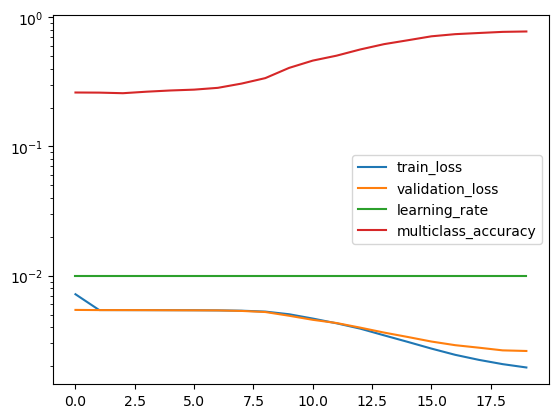

model state dict saved...
model: demo_model saved...


In [2]:
# sklearn dataset wrapper (SKDS) with torcheval metrics (Metrics) and cosmosis model (FFNet)

model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4,
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [SqueezeN()],
                                           'X': []},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 100000,
                                         'n_features': 256,
                                         'n_informative': 200,
                                         'n_redundant': 5,
                                         'n_repeated': 5,
                                         'n_clusters_per_class': 5,
                                         'flip_y': 0.05,
                                         'class_sep': 0.05,
                                         'n_classes': 4}}}
                                     
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'metric_name': 'multiclass_accuracy', #torcheval
                 'metric_param': {'num_classes': 4}}

opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

learn = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, 
              sample_param=sample_param, opt_param=opt_param, 
              sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param,
              batch_size=256, epochs=20, 
              save_model='demo_model')


In [5]:
# inference with sklearn classification dataset wrapper (SKDS) and cosmosis model (FFNet)

model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4, 
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 100000,
                                         'n_features': 256,
                                         'n_informative': 200,
                                         'n_redundant': 5,
                                         'n_repeated': 5,
                                         'n_clusters_per_class': 5,
                                         'flip_y': 0.05,
                                         'class_sep': 0.05,
                                         'n_classes': 4}}}
                                     
learn = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=None,
              model_param=model_param, ds_param=ds_param, 
              batch_size=128, epochs=2, load_model='demo_model.pth')


creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
applying _init_weights...
FFNet model loaded...
number of model parameters:  79620
model loaded from state_dict...
running model on gpu...

.....................

total learning time: 0:00:01.325255
predictions[-1]:  [-1.5757571  2.1752043 -2.0871816 -1.1383128]
predictions.shape:  (100000, 4)
inference instance 2025-06-16 08:01:03.676564 complete and saved to csv...

.....................

total learning time: 0:00:02.920725
predictions[-1]:  [-2.460392    0.82457376 -3.131393   -1.1545402 ]
predictions.shape:  (100000, 4)
inference instance 2025-06-16 08:01:05.272034 complete and saved to csv...


creating torch vision CIFAR10 dataset...
Files already downloaded and verified
CDataset created...
creating torch vision CIFAR10 dataset...
Files already downloaded and verified
CDataset created...
torchvision model resnet18 loaded...
running model on gpu...

.....................

total elapsed time: 0:00:31.690123
epoch: 5
y_pred:  tensor([-0.4415, -2.0087,  0.6836,  0.9978,  0.6095,  0.9839,  0.6521, -0.3400,
        -1.6857, -2.1617], device='cuda:0')
y:  tensor(5, device='cuda:0')
train loss: 1.5624006361961364, val loss: 1.5736103327043596
lr: 0.01
roc_auc_score train score: 0.8511460105016397, validation score: 0.8539817888457201

........final........

total learning time: 0:00:57.864741
test loss: 1.4270061203956603
roc_auc_score test metric: 0.8825304111111111


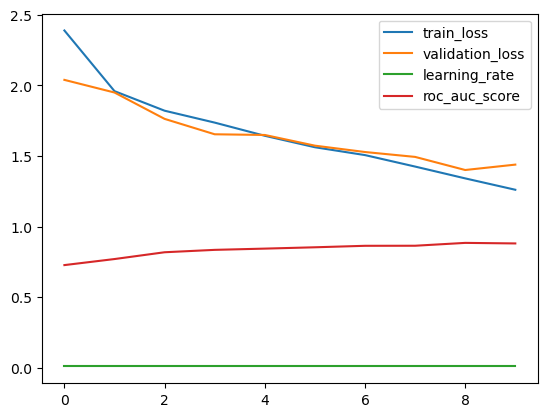

In [2]:
# cosmosis torchvision dataset wrapper (TVDS) with transforms and torchvision model wrapper (tv_model)
model_param = {'model_name': 'resnet18',
               'in_channels': 3,
               'tv_param': {'num_classes': 10}}

ds_param={'train_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': True,
                                       'download': True,
                                       'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(64),
                                                           transforms.ToTensor()]),
                                       'target_transform': None,
                                       'download': True}},
           'test_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': False,
                                       'download': True,
                                       'transform': transforms.Compose([
                                                         transforms.Resize(64),
                                                         transforms.ToTensor()]),
                                       'target_transform': None,
                                       'download': True}}}

metrics_param = {'report_interval': 30, 
                 'metric_name': 'roc_auc_score', 
                 'metric_param': {'average': 'macro',
                                  'multi_class': 'ovr'}}

opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.8,),
                'subset': .1}

sched_param = {'factor': .5,
               'patience': 1,
               'cooldown': 1}

learn = Learn([TVDS,TVDS], 
              tv_model, 
              Selector, 
              Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
              model_param=model_param, ds_param=ds_param, sample_param=sample_param, 
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=16, epochs=10)

creating torch vision CIFAR10 dataset...
CDataset created...
creating torch vision CIFAR10 dataset...
CDataset created...
torchvision model resnext50_32x4d loaded...
running model on gpu...

.....................

total elapsed time: 0:01:58.216564
epoch: 1
y_pred:  tensor([ 1.0626,  1.4837, -1.2240, -0.9979, -2.7755, -1.6023, -2.8175, -0.5398,
         1.4419,  1.1839], device='cuda:0')
y:  tensor(9, device='cuda:0')
train loss: 2.07954767370224, val loss: 2.004468406400373
lr: 0.01
roc_auc_score train score: 0.6983499768966432, validation score: 0.7360531829352286

.....................

total elapsed time: 0:02:58.373979
epoch: 2
y_pred:  tensor([ 0.6598,  1.9266, -2.6788, -1.4943, -2.9786, -1.7310, -2.3196,  0.1832,
         1.3204,  1.8747], device='cuda:0')
y:  tensor(1, device='cuda:0')
train loss: 1.9832571868896485, val loss: 1.8980106057659272
lr: 0.01
roc_auc_score train score: 0.7359292696539754, validation score: 0.7789387296786844

.....................

total elapsed tim

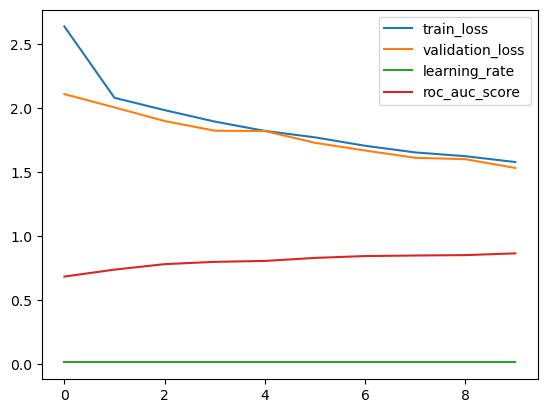

In [3]:
# cosmosis torchvision dataset wrapper (TVDS) with transforms and torchvision model wrapper (tv_model)
model_param = {'model_name': 'resnext50_32x4d',
               'in_channels': 3,
               'tv_param': {'num_classes': 10}}

ds_param={'train_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': True,
                                       'transform': transforms.Compose([
                                                    transforms.RandomRotation(10),
                                                    transforms.Resize(256),
                                                    transforms.ToTensor()]),
                                       'target_transform': None}},
           'test_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': False,
                                       'transform': transforms.Compose([
                                                    transforms.Resize(256),
                                                    transforms.ToTensor()]),
                                       'target_transform': None}}}

metrics_param = {'report_interval': 60, 
                 'metric_name': 'roc_auc_score', 
                 'metric_param': {'average': 'macro',
                                  'multi_class': 'ovr'}}

opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.8,),
                'subset': .1}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_param=model_param, ds_param=ds_param, 
          sample_param=sample_param, opt_param=opt_param, 
          sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param,
          batch_size=16, epochs=10)